# Goal

Represent digits '3' in 2D.
+ convert data from the [UCI Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
+ perform PCA over all digit '3' with 2 components
+ plot the PCA results as below (also in page #12 of PCA)

## convert data and perform PCA over alll digit '3' with 2 components

In [ ]:
import matplotlib.pyplot as plt
import random

In [244]:
def load_data(path):
    digits, labels = [], []
    with open(path) as fo:
        for line in fo.readlines():
            elems = np.array(line.split(",")).astype(int)
            digit, label = elems[:-1], elems[-1]
            digits.append(digit)
            labels.append(label)
    return digits, labels

def filter_digits(digits, labels, num=3):
    fdigits = []
    for digit, label in zip(digits, labels):
        if label == num:
            fdigits.append(digit)
    return np.stack(fdigits)

def decompose(digits): 
    digits = digits - digits.mean(0) 
    u, d, v = np.linalg.svd(digits)
    return u[:, :2], np.diag(d[:2]) @ v[:2, :]


path = "data/optdigits.tra"
# path = "data/optdigits.tes"
digits, labels = load_data(path)

threes = filter_digits(digits, labels)
proj_coef, proj_axis = decompose(threes)

sampled_idx = random.sample(range(threes.shape[0]), 25)
sampled_threes = threes[sampled_idx]

## plot the PCA results

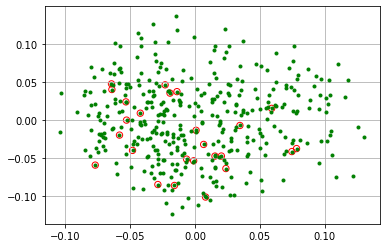

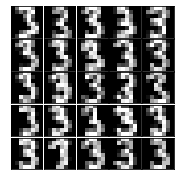

In [287]:
plt.plot(proj_coef[:, 0], proj_coef[:, 1], ".g")

plt.scatter(proj_coef[sampled_idx, 0], proj_coef[sampled_idx, 1], s=40, facecolors="none", edgecolors="r")
plt.grid()

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(3, 3))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5))
for ax, three in zip(grid, sampled_threes):
    img = three.reshape((8, 8))
#     img = (img == 0).astype(int) # binary
    ax.imshow(img, cmap="gray") 
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

## the image of PCA components

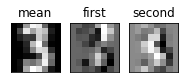

In [286]:
fig, axs = plt.subplots(1, 3, figsize=(3, 3))
ax = axs[0]
ax.title.set_text("mean")
ax.imshow(threes.mean(0).reshape((8, 8)), cmap="gray")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = axs[1]
ax.title.set_text("first")
ax.imshow(proj_axis[0].reshape((8, 8)), cmap="gray")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = axs[2]
ax.title.set_text("second")
ax.imshow(proj_axis[1].reshape((8, 8)), cmap="gray")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
